<a href="https://colab.research.google.com/github/asyrofist/Extraction-Requirement/blob/main/modul_ekspart_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install XlsxWriter 

In [66]:
#@title Modul1: Ekstraksi Kebutuhan PartOf { vertical-output: true }
file_param = "/content/drive/MyDrive/dataset/dataset_2.xlsx" #@param {type:"string"}
grd_param = "/content/drive/MyDrive/dataset/dataset_2_split.xlsx" #@param {type:"string"}

# srs_param = "2003 - Tachonet" #@param ["0000 - cctns", "0000 - gamma j", "0000 - Inventory", "1998 - themas", "1999 - dii", "1999 - multi-mahjong", "1999 - tcs", "2000 - nasa x38", "2001 - ctc network", "2001 - esa", "2001 - hats", "2001 -libra", "2001 - npac", "2001 - space fractions", "2002 - evia back", "2002 - evia corr", "2003 - agentmom", "2003 - pnnl", "2003 - qheadache", "2003 - Tachonet", "2004 - colorcast", "2004 - eprocurement", "2004 - grid bgc", "2004 - ijis", "2004 - Phillip", "2004 - rlcs", "2004 - sprat", "2005 - clarus high", "2005 - clarus low", "2005 - Grid 3D", "2005 - nenios", "2005 - phin", "2005 - pontis", "2005 - triangle", "2005 - znix", "2006 - stewards", "2007 - ertms", "2007 - estore", "2007 - nde", "2007 - get real 0.2", "2007 - mdot", "2007 - nlm", "2007 - puget sound", "2007 - water use", "2008 - caiso", "2008 - keepass", "2008 - peering", "2008 - viper", "2008 - virtual ed", "2008 - vub", "2009 - email", "2009 - gaia", "2009 - inventory 2.0", "2009 - library", "2009 - library2", "2009 - peazip", "2009 - video search", "2009 - warc III", "2010 - blit draft", "2010 - fishing", "2010 - gparted", "2010 - home", "2010 - mashboot", "2010 - split merge"]
srs_param = "2005 - Grid 3D" #@param ["0000 - Inventory", "2001 - esa", "2001 - space fractions", "2003 - agentmom", "2003 - Tachonet", "2004 - colorcast", "2004 - Phillip", "2005 - Grid 3D", "2005 - triangle", "2007 - puget sound", "2008 - peering"]
data_simpan = "/content/drive/MyDrive/dataset/visualPartOf/partOf{}".format(srs_param)

# function
import pandas as pd
import graphviz
import xlsxwriter
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

class partOf: #template

  def __init__(self, inputData  = file_param): 
      self.__data         = inputData

  def fulldataset(self, inputSRS):
      xl = pd.ExcelFile(self.__data)
      dfs = {sh:xl.parse(sh) for sh in xl.sheet_names}[inputSRS]
      return dfs

  def preprocessing(self):
      xl = pd.ExcelFile(self.__data)
      for sh in xl.sheet_names:
        df = xl.parse(sh)
        print('Processing: [{}] ...'.format(sh))
        print(df.head())

  def visualisasiGraph(self, source_data, part_data, srs_param):
      f = graphviz.Digraph('finite_state_machine', filename='partOf.gv', engine= 'neato')
      f.attr(rankdir='LR', size='8,5')

      f.attr('node', shape='doublecircle') # node
      for angka in source_data.ID:
          f.node(angka)
      f.attr(kw= 'node', shape='circle') # edge
      for idx, num in zip(part_data.label, part_data.ID):
          f.edge(idx, num, label='partOf')

      f.attr(overlap='false')
      f.attr(label=r'Visulasisasi relasi partOf {}\n'.format(srs_param))
      f.attr(fontsize='12')
      f.view(data_simpan)
      print("Gambar disimpan ke {}".format(data_simpan))
      return f

  def evaluasi_data(self, data1, data2):
      y_actual = data1.encoder.values.astype(int) #define array of actual values
      y_predicted = data2.encoder.values.astype(int) #define array of predicted values
      print("akurasi", accuracy_score(y_true= y_actual, y_pred= y_predicted, normalize=True, sample_weight=None))
      print("recall", recall_score(y_true= y_actual, y_pred= y_predicted, average= 'macro'))
      print("presion", precision_score(y_true= y_actual, y_pred= y_predicted, average= 'macro'))
      print("akurasi", classification_report(y_true= y_actual, y_pred= y_predicted))

  def simpan_excel(self, data1, data2, data3):
      # save file
      dfs  = {
                'tabel_kebutuhan' : data1, 
                'tabel_partOf' : data2,
                'tabel_relasi' : data3,
              } 
      writer = pd.ExcelWriter(data_simpan+ '.xlsx')
      for name,dataframe in dfs.items():
          dataframe.to_excel(writer,name,index=False)
      writer.save()
      print("data excel disimpan di {}".format(data_simpan+ '.xlsx'))



  def __del__(self):
    print("Destructed_called")



if __name__ == "__main__":
  try:
# tabulasi pertama
      myPartOf = partOf()    # myPartOf.preprocessing()
      hasil_srs = []
      a = myPartOf.fulldataset(srs_param)
      for idx, num in zip(a['ID'], a['Requirement Statement'].fillna("empty")):
          data = [x12 for x in num.split("(i.e.,") 
                      for x1 in x.split(".")  
                      for x3 in x1.split("/") for x4 in x3.split(" so ")  
                      for x5 in x4.split(",") for x6 in x5.split(" and ")
                      for x7 in x6.split(" i.e.") for x8 in x7.split(" or ")
                      for x9 in x8.split(" that ") for x10 in x9.split(")")
                      for x11 in x10.split(" if ")  for x12 in x11.split(" ; ")]

      # for idx, num in zip(a['ID'], a['Requirement Statement']):
      #     data = re.split('; |, |\*|\n| and | or | . | that | i.e. ', num)

          conv = lambda i : i or None
          res = [conv(i) for i in data]
          hasil_srs.append([idx, res])
      a_df = pd.DataFrame(hasil_srs, columns = ['ID', 'data'])

      c_df = a_df.copy()
      data_df = pd.DataFrame([sh for sh in c_df.data], index= a.ID)
      list_column = ["data{}".format(num) for num in range(data_df.columns.stop)]
      data_df.columns = list_column

      b_df = []
      for num in c_df.data:
        if len(num) > 1:
          b_df.append('non_atomik')
        elif len(num) == 1:
          b_df.append('atomik')
      c_df['label'] = b_df
      print("Data Atomik dan Non Atomik {}".format(srs_param))
      print(tabulate(c_df, headers = 'keys', tablefmt = 'psql'))

# tabulasi kedua
      na_data = c_df.loc[c_df['label'] == 'non_atomik']
      data_na = [([na_data.ID[num], index, 'p{}'.format(idx)]) for idx, num in enumerate(na_data.index) for index in na_data.data[num] if index is not None]
      na_df = pd.DataFrame(data_na, columns= ['ID', 'req', 'label'])
      a_data = c_df.loc[c_df['label'] == 'atomik']
      data_a = [([a_data.ID[num], index, 'atomik']) for num in a_data.index for idx, index in enumerate(a_data.data[num]) if index is not None]
      a_df = pd.DataFrame(data_a, columns= ['ID', 'req', 'label'])

      part_df = pd.concat([a_df, na_df], ignore_index= True)
      part_srt = part_df.sort_values(by='ID', ignore_index= True).drop_duplicates()
      print("\nData relasi partOf {}".format(srs_param))
      print(tabulate(part_srt, headers = 'keys', tablefmt = 'psql'))

# tabulasi ketiga
      list_data = [part_srt.loc[part_srt.ID == num].label for num in c_df.ID]
      tb_part = pd.DataFrame(list_data).fillna(0)
      tb_part.columns = part_srt.ID
      tb_part.index = c_df.ID
      print("\nTabulasi Relasi Kebutuhan partOf  {}".format(srs_param))
      print(tabulate(tb_part, headers = 'keys', tablefmt = 'psql'))
      myPartOf.simpan_excel(c_df, part_srt, tb_part)

# # Alternatif
#       d_df = c_df.copy()
#       d_df.rename(columns = {'data':'req'}, inplace = True)
#       na_data = d_df.loc[d_df['label'] == 'non_atomik']
#       data_na = [([na_data.ID[num], index, 'p{}'.format(idx)]) for idx, num in enumerate(na_data.index) for index in na_data.req[num] if index is not None]
#       na_df = pd.DataFrame(data_na, columns= ['ID', 'req', 'label'])

#       a_data = d_df.loc[d_df['label'] == 'atomik']
#       data_a = [([a_data.ID[num], index, 'atomik']) for num in a_data.index for idx, index in enumerate(a_data.req[num]) if index is not None]
#       a_df = pd.DataFrame(data_a, columns= ['ID', 'req', 'label'])

#       dt = pd.concat([a_df, na_df, na_data], ignore_index= True)
#       part_br = dt.sort_values(by='ID', ignore_index= True)
#       list_data = [part_br.loc[part_br.ID == num].label for num in c_df.ID]
#       dt_part = pd.DataFrame(list_data).fillna("0")
#       dt_part.columns = part_br.ID
#       dt_part.index = d_df.ID
#       print("\nTabulasi Relasi Kebutuhan  {}".format(srs_param))
#       print(tabulate(dt_part, headers = 'keys', tablefmt = 'psql'))

#       # rename data
#       data_part = [(['{}_{}'.format(na_data.ID[num], idy), index, 'p{}'.format(idx)]) for idx, num in enumerate(na_data.index) for idy, index in enumerate(na_data.req[num]) if index is not None]
#       na_part = pd.DataFrame(data_part, columns= ['ID', 'req', 'label'])
#       dt_rename = pd.concat([a_df, na_part, na_data], ignore_index= True)
#       sort_rename = dt_rename.sort_values(by='ID', ignore_index= True)
#       dt_part.columns= sort_rename.ID
#       dt_part.index = d_df.ID
#       print("\nTabulasi Relasi Kebutuhan  {}".format(srs_param))
#       print(tabulate(dt_part, headers = 'keys', tablefmt = 'psql'))

# visualisasi
      na_data = c_df.loc[c_df['label'] == 'non_atomik']
      part_list = [([na_data.ID[num], index, 'p{}_{}'.format(idx, idy)]) for idx, num in enumerate(na_data.index) for idy, index in enumerate(na_data.data[num]) if index is not None]
      part_visual = pd.DataFrame(part_list, columns= ['ID', 'req', 'label'])
      myPartOf.visualisasiGraph(c_df, part_visual, srs_param)

# evaluasi
      myPartOf2 = partOf(grd_param)
      part_grd = myPartOf2.fulldataset(srs_param)
      label_encoder =LabelEncoder() # label_encoder object
      part_srt['encoder']= label_encoder.fit_transform(part_srt['label']) # Encode labels in column. 
      part_grd['encoder']= label_encoder.fit_transform(part_grd['Sentence']) # Encode labels in column. 

      print("\nData Evaluas Relasi partOf  {}".format(srs_param))
      eval_df = pd.concat([part_srt, part_grd], axis= 1)
      print(tabulate(eval_df, headers = 'keys', tablefmt = 'psql'))
      myPartOf2.evaluasi_data(part_srt, part_grd)


      myPartOf.__del__()


  except OSError as err:
    print("OS error: {0}".format(err))


Destructed_called
Data Atomik dan Non Atomik 2005 - Grid 3D
+----+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|    | ID   | data                                                                                                                                                                                              | label      |
|----+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------|
|  0 | F01  | ['The product shall plot the data points in a scientifically correct manner']                                                                                                                     | atomik     |
|  1 | F02  | ['The grid axis should be labelled

Gambar disimpan ke /content/drive/MyDrive/dataset/visualPartOf/partOf2005 - Grid 3D


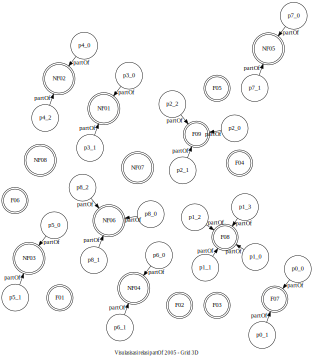

In [20]:
myPartOf.visualisasiGraph(c_df, part_visual, srs_param)

In [74]:
#@title Modul2: Ekstraksi Triplet { vertical-output: true }
file_param = "/content/drive/MyDrive/dataset/visualPartOf/partOf2005 - Grid 3D.xlsx" #@param {type:"string"}
tab_param = "tabel_partOf" #@param ["tabel_kebutuhan", "tabel_partOf", "tabel_relasi"]
req_param = "req" #@param ["data", "req"]

url_param = "http://corenlp.run" #@param {type:"string"}
mode_param = "parse_tree" #@param ["parse_tree", "spo", "result", "all"]

import nltk, pandas as pd, numpy as np
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.tag.stanford import CoreNLPPOSTagger
from nltk.tree import ParentedTree

class extractNlp:
  def __init__(self, coreUrl = url_param, fileName= file_param):
      self.__dep_parser = CoreNLPDependencyParser(url= coreUrl)
      self.__pos_tagger = CoreNLPPOSTagger(url= coreUrl)
      self.__data = fileName

  def fulldataset(self, inputSRS= tab_param):
      xl = pd.ExcelFile(self.__data)
      dfs = {sh:xl.parse(sh) for sh in xl.sheet_names}[inputSRS]
      return dfs

  def preprocessing(self):
      xl = pd.ExcelFile(self.__data)
      for sh in xl.sheet_names:
        df = xl.parse(sh)
        print('Processing: [{}] ...'.format(sh))
        print(df.head())

  def triplet_extraction (self, input_sent, output=['parse_tree','spo','result']):
      # Parse the input sentence with Stanford CoreNLP Parser
      pos_type = self.__pos_tagger.tag(input_sent.split())
      parse_tree, = ParentedTree.convert(list(self.__pos_tagger.parse(input_sent.split()))[0])
      dep_type, = ParentedTree.convert(self.__dep_parser.parse(input_sent.split()))

      # Extract subject, predicate and object
      subject = extract_subject(parse_tree)
      predicate = extract_predicate(parse_tree)
      objects = extract_object(parse_tree)
      if 'parse_tree' in output:
          print('---Parse Tree---')
          parse_tree.pretty_print()
      elif 'spo' in output:
          print('---Subject---')
          print(subject)
          print('---Predicate---')
          print(predicate)
          print('---Object---')
          print(objects)
      elif 'result' in output:
          print('---Result---')
          print(' '.join([subject[0], predicate[0], objects[0]]))

  def extract_subject (self, parse_tree):
      # Extract the first noun found in NP_subtree
      subject = []
      for s in parse_tree.subtrees(lambda x: x.label() == 'NP'):
          for t in s.subtrees(lambda y: y.label().startswith('NN')):
              output = [t[0], extract_attr(t)]
              # Avoid empty or repeated values
              if output != [] and output not in subject:
                  subject.append(output) 
      if len(subject) != 0: return subject[0] 
      else: return ['']

  def extract_predicate (self, parse_tree):
      # Extract the deepest(last) verb foybd ub VP_subtree
      output, predicate = [],[]
      for s in parse_tree.subtrees(lambda x: x.label() == 'VP'):
          for t in s.subtrees(lambda y: y.label().startswith('VB')):
              output = [t[0], extract_attr(t)]
              if output != [] and output not in predicate:    
                  predicate.append(output)
      if len(predicate) != 0: return predicate[-1]
      else: return ['']

  def extract_object (self, parse_tree):
      # Extract the first noun or first adjective in NP, PP, ADP siblings of VP_subtree
      objects, output, word = [],[],[]
      for s in parse_tree.subtrees(lambda x: x.label() == 'VP'):
          for t in s.subtrees(lambda y: y.label() in ['NP','PP','ADP']):
              if t.label() in ['NP','PP']:
                  for u in t.subtrees(lambda z: z.label().startswith('NN')):
                      word = u          
              else:
                  for u in t.subtrees(lambda z: z.label().startswith('JJ')):
                      word = u
              if len(word) != 0:
                  output = [word[0], extract_attr(word)]
              if output != [] and output not in objects:
                  objects.append(output)
      if len(objects) != 0: return objects[0]
      else: return ['']

  def extract_attr (self, word):
      attrs = []     
      # Search among the word's siblings
      if word.label().startswith('JJ'):
          for p in word.parent(): 
              if p.label() == 'RB':
                  attrs.append(p[0])
      elif word.label().startswith('NN'):
          for p in word.parent():
              if p.label() in ['DT','PRP$','POS','JJ','CD','ADJP','QP','NP']:
                  attrs.append(p[0])
      elif word.label().startswith('VB'):
          for p in word.parent():
              if p.label() == 'ADVP':
                  attrs.append(p[0])
      # Search among the word's uncles
      if word.label().startswith('NN') or word.label().startswith('JJ'):
          for p in word.parent().parent():
              if p.label() == 'PP' and p != word.parent():
                  attrs.append(' '.join(p.flatten()))
      elif word.label().startswith('VB'):
          for p in word.parent().parent():
              if p.label().startswith('VB') and p != word.parent():
                  attrs.append(' '.join(p.flatten()))
      return attrs

if __name__ == "__main__":
  try:
      myExtract = extractNlp()
      for num in myExtract.fulldataset(tab_param)[req_param]:
        myExtract.triplet_extraction(num, output= mode_param)
        if mode_param == 'all':
          myExtract.triplet_extraction(num)

  except OSError as err:
    print("OS error: {0}".format(err))

---Parse Tree---
                                S                                                    
      __________________________|_____                                                
     |                                VP                                             
     |             ___________________|_____                                          
     |            |                         VP                                       
     |            |     ____________________|___                                      
     |            |    |        |               PP                                   
     |            |    |        |            ___|________                             
     |            |    |        |           |            NP                          
     |            |    |        |           |    ________|_______________________     
     NP           |    |        NP          |   |                 ADJP           |   
  ___|_____       |    |     ___